<a href="https://colab.research.google.com/github/jzhan166/ATMS-597-SP-2020-Project-3/blob/master/Project_3_groupD_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pydap
!pip install netcdf4

!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install Cython
!pip install --upgrade --force-reinstall shapely --no-binary shapely
!pip install cartopy

%pylab inline
import pandas as pd
import xarray as xr

     |████████████████████████████████| 2.3MB 4.6MB/s 
     |████████████████████████████████| 122kB 61.8MB/s 
     |████████████████████████████████| 4.1MB 5.1MB/s 
     |████████████████████████████████| 317kB 47.0MB/s 
Selecting previously unselected package libgeos-dev.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up libproj-dev:amd64 (4.9.3-2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 358kB 5.2MB/s 
Skipping wheel build

# **Extreme Precipitation Days (1996-2019)**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install gdown
!gdown https://drive.google.com/drive/u/1/folders/1sb5kMCae3W_yfc8Ul3xaSHYjigbIk2OC

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=None
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/drive/u/1/folders/1sb5kMCae3W_yfc8Ul3xaSHYjigbIk2OC
To: /content/1sb5kMCae3W_yfc8Ul3xaSHYjigbIk2OC
65.0kB [00:00, 9.65MB/s]


In [0]:
precip_data = pd.read_csv("/content/drive/My Drive/Xtreme_Precip_days_Hilo.csv")

In [0]:
# precip_data = precip_data.drop(['Time'], axis=1)
precip_data


,time,latitude,longitude,precip
0,1996-10-16,20.0,205.0,15.163979
1,1996-11-13,20.0,205.0,38.501457
2,1996-11-14,20.0,205.0,38.944233
3,1996-11-22,20.0,205.0,16.506926
4,1997-11-03,20.0,205.0,9.424886
...,...,...,...,...
104,2018-10-19,20.0,205.0,11.067375
105,2018-10-20,20.0,205.0,16.663464
106,2018-12-30,20.0,205.0,15.177353
107,2019-10-10,20.0,205.0,10.696703


In [0]:
# time = pd.to_datetime(precip_data['time'], format='%Y%m%d', errors='ignore')
# time

0      1996-10-16
1      1996-11-13
2      1996-11-14
3      1996-11-22
4      1997-11-03
          ...    
104    2018-10-19
105    2018-10-20
106    2018-12-30
107    2019-10-10
108    2019-10-26
Name: time, Length: 109, dtype: object

In [0]:
# precip_data
# year = pd.DatetimeIndex(precip_data['time']).year
# year

Int64Index([1996, 1996, 1996, 1996, 1997, 1997, 1997, 1998, 1998, 1998,
            ...
            2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2019, 2019],
           dtype='int64', name='time', length=109)

In [0]:
pd.to_datetime(np.array(precip_data['time'][pd.DatetimeIndex(precip_data['time']).year.values == iyr]))

DatetimeIndex(['1996-10-16', '1996-11-13', '1996-11-14', '1996-11-22'], dtype='datetime64[ns]', freq=None)

In [0]:
np.array(precip_data['time'][pd.DatetimeIndex(precip_data['time']).year.values == 2006])

array(['2006-10-01', '2006-10-06', '2006-10-17', '2006-10-20',
       '2006-11-02', '2006-11-03', '2006-12-02'], dtype=object)

In [0]:
len(precip_data['time'][pd.DatetimeIndex(precip_data['time']).year.values == 2005])

0

In [0]:
# **NCEP reanalysis data on Extreme Precipitation Days (1996-2019)**

In [0]:
years = pd.date_range(start='1996-01-01', end='2019-12-31', freq='D')
yearmon = years[(years.month==10) | (years.month==11) | (years.month==12)]



In [0]:
windv_250_ds = []
windu_250_ds = []
windv_500_ds = []
windu_500_ds = []
hgt_500_ds = []
windv_850_ds = []
windu_850_ds = []
temp_850_ds = []
shum_850_ds = []
sktemp_ds = []
surf_windu_ds = []
surf_windv_ds = []
pr_wtr_ds = []

years = [i for i in range(1996,2020)]


for iyr in years:
    print('working on '+str(iyr))
    if len(precip_data['time'][pd.DatetimeIndex(precip_data['time']).year.values == iyr])>0:
      dates_year = pd.to_datetime(np.array(precip_data['time'][pd.DatetimeIndex(precip_data['time']).year.values == iyr]))
      #find 3 random dates in 1996 during June - August - here you would put your extreme precip dates for this year
      #dates = random_dates2(pd.datetime(iyr,6,1), pd.datetime(iyr,8,31), 3)
      #let's access geopotential height at 500 hPa
      windu_250 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=250,time=dates_year)
      windu_250_ds.append(windu_250)

      windv_250 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=250,time=dates_year)
      windv_250_ds.append(windv_250)

      windu_500 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=500,time=dates_year)
      windu_500_ds.append(windu_500)

      windv_500 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=500,time=dates_year)
      windv_500_ds.append(windv_500)

      hgt_500 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/hgt.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=500,time=dates_year)
      hgt_500_ds.append(hgt_500)

      temp_850 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/air.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=850,time=dates_year)
      temp_850_ds.append(temp_850)

      shum_850 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/shum.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=850,time=dates_year)
      shum_850_ds.append(shum_850)

      windu_850 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=850,time=dates_year)
      windu_850_ds.append(windu_850)

      windv_850 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(level=850,time=dates_year)
      windv_850_ds.append(windv_850)

      sktemp = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/skt.sfc.gauss.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(time=dates_year)
      sktemp_ds.append(sktemp)

      surf_windu = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/uwnd.sig995.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(time=dates_year)
      surf_windu_ds.append(surf_windu)

      surf_windv = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/vwnd.sig995.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(time=dates_year)
      surf_windv_ds.append(surf_windv)

      pr_wtr = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/pr_wtr.eatm.'+str(iyr)+'.nc',
                          engine='netcdf4').sel(time=dates_year)
      pr_wtr_ds.append(pr_wtr)

working on 1996
working on 1997
working on 1998
working on 1999
working on 2000
working on 2001
working on 2002
working on 2003
working on 2004
working on 2005
working on 2006
working on 2007
working on 2008
working on 2009
working on 2010
working on 2011
working on 2012
working on 2013
working on 2014
working on 2015
working on 2016
working on 2017
working on 2018
working on 2019


In [0]:
windv_850_ds

In [0]:
windu_250_ds_yearcombined = xr.concat(windu_250_ds, dim='time')
windu_250_ds_yearcombined

windv_250_ds_yearcombined = xr.concat(windv_250_ds, dim='time')
windv_250_ds_yearcombined

hgt_500_ds_yearcombined = xr.concat(hgt_500_ds, dim='time')
hgt_500_ds_yearcombined

windu_500_ds_yearcombined = xr.concat(windu_500_ds, dim='time')
windu_500_ds_yearcombined

windv_500_ds_yearcombined = xr.concat(windv_500_ds, dim='time')
windv_500_ds_yearcombined

windu_850_ds_yearcombined = xr.concat(windu_850_ds, dim='time')
windu_850_ds_yearcombined

windv_850_ds_yearcombined = xr.concat(windv_850_ds, dim='time')
windv_850_ds_yearcombined

temp_850_ds_yearcombined = xr.concat(temp_850_ds, dim='time')
temp_850_ds_yearcombined

shum_850_ds_yearcombined = xr.concat(shum_850_ds, dim='time')
shum_850_ds_yearcombined

sktemp_ds_yearcombined = xr.concat(sktemp_ds, dim='time')
sktemp_ds_yearcombined

surf_windu_ds_yearcombined = xr.concat(surf_windu_ds, dim='time')
surf_windu_ds_yearcombined

surf_windv_ds_yearcombined = xr.concat(surf_windv_ds, dim='time')
surf_windv_ds_yearcombined

pr_wtr_ds_yearcombined = xr.concat(pr_wtr_ds, dim='time')
pr_wtr_ds_yearcombined

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 109)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1996-10-16 1996-11-13 ... 2019-10-26
Data variables:
    pr_wtr   (time, lat, lon) float32 3.0499878 3.0499878 ... 0.05 0.05
Attributes:
    Conventions:                     COARDS
    title:                           mean daily NMC reanalysis (1996)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    history:                         created 96/03/28 by Hoop (netCDF2.3.2)\n...
    References:                      http://www.esrl.noaa.gov/psd/data/gridde...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    DODS_EXTRA.Unlimited_Dimension:  time

In [0]:
pr_wtr_ds_yearcombined.to_netcdf('pr_wtr_ds_yearcombined_extrem.nc')
surf_windv_ds_yearcombined.to_netcdf('surf_windv_ds_yearcombined_extrem.nc')
surf_windu_ds_yearcombined.to_netcdf('surf_windu_ds_yearcombined_extrem.nc')
sktemp_ds_yearcombined.to_netcdf('sktemp_ds_yearcombined_extrem.nc')
shum_850_ds_yearcombined.to_netcdf('shum_850_ds_yearcombined_extrem.nc')
temp_850_ds_yearcombined.to_netcdf('temp_850_ds_yearcombined_extrem.nc') 
windv_850_ds_yearcombined.to_netcdf('windv_850_ds_yearcombined_extrem.nc')
windu_850_ds_yearcombined.to_netcdf('windu_850_ds_yearcombined_extrem.nc')
windv_500_ds_yearcombined.to_netcdf('windv_500_ds_yearcombined_extrem.nc')
windu_500_ds_yearcombined.to_netcdf('windu_500_ds_yearcombined_extrem.nc')
hgt_500_ds_yearcombined.to_netcdf('hgt_500_ds_yearcombined_extrem.nc')
windv_250_ds_yearcombined.to_netcdf('windv_250_ds_yearcombined_extrem.nc')
windu_250_ds_yearcombined.to_netcdf('windu_250_ds_yearcombined_extrem.nc')

!mv *.nc "/content/drive/My Drive/"

In [33]:
pr_wtr = xr.open_dataset('/content/drive/My Drive/pr_wtr_ds_yearcombined_extrem.nc', engine='netcdf4')
pr_wtr_avg = pr_wtr.mean(dim='time')

pr_wtr_avg['pr_wtr']
# import matplotlib.pyplot as plt

# plt.pcolormesh(avg)
# plt.show()

<xarray.DataArray 'pr_wtr' (lat: 73, lon: 144)>
array([[2.3486238, 2.3486238, 2.3486238, ..., 2.3486238, 2.3486238,
        2.3486238],
       [1.6146789, 1.6146789, 1.6146789, ..., 1.7614679, 1.6880734,
        1.6880734],
       [1.9082569, 2.0550458, 2.1284404, ..., 1.9082569, 1.9082569,
        1.9816514],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [35]:
pr_wtr_avg

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    pr_wtr   (lat, lon) float32 2.3486238 2.3486238 2.3486238 ... 0.0 0.0 0.0

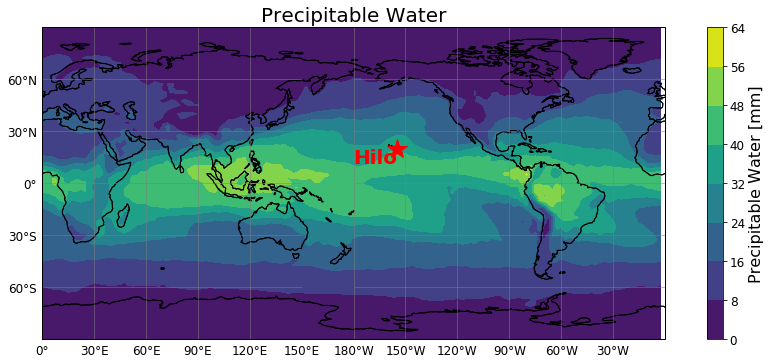

In [214]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(12,5))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_global()

ax.add_feature(cfeature.COASTLINE.with_scale('110m'))

c1 = ax.contourf(pr_wtr_avg['lon'], pr_wtr_avg['lat'], pr_wtr_avg['pr_wtr'],
             transform=ccrs.PlateCarree(), cmap='viridis')
# c1 = ax.contourf(hgt_avg['lon'], hgt_avg['lat'], hgt_avg['hgt'],
#              transform=ccrs.PlateCarree(), levels = np.linspace(4500, 6000, 16), cmap='viridis')

# ax.contourf(pr_wtr_avg['lon'], pr_wtr_avg['lat'], pr_wtr_avg['pr_wtr'].values.squeeze(), 20, transform=ccrs.PlateCarree(),cmap='viridis')

ax.plot(205.0, 20.0, 'r*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='r',transform=ccrs.PlateCarree())
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False
ax.coastlines()

plt.title('Precipitable Water', fontsize = 20)

cb = fig.colorbar(c1, shrink=1)
cb.ax.tick_params(labelsize = 12)
cb.set_label('Precipitable Water [mm]', fontsize = 16)
plt.tight_layout()
plt.show()
fig.savefig('pr_wtr.png')



In [0]:
hgt = xr.open_dataset('/content/drive/My Drive/hgt_500_ds_yearcombined_extrem.nc', engine='netcdf4')
uwind = xr.open_dataset('/content/drive/My Drive/windu_500_ds_yearcombined_extrem.nc', engine='netcdf4')
vwind = xr.open_dataset('/content/drive/My Drive/windv_500_ds_yearcombined_extrem.nc', engine='netcdf4')


hgt_avg = hgt.mean(dim='time')
vwind_avg = vwind.mean(dim='time')
uwind_avg = uwind.mean(dim='time')

uwind_avg['uwnd']

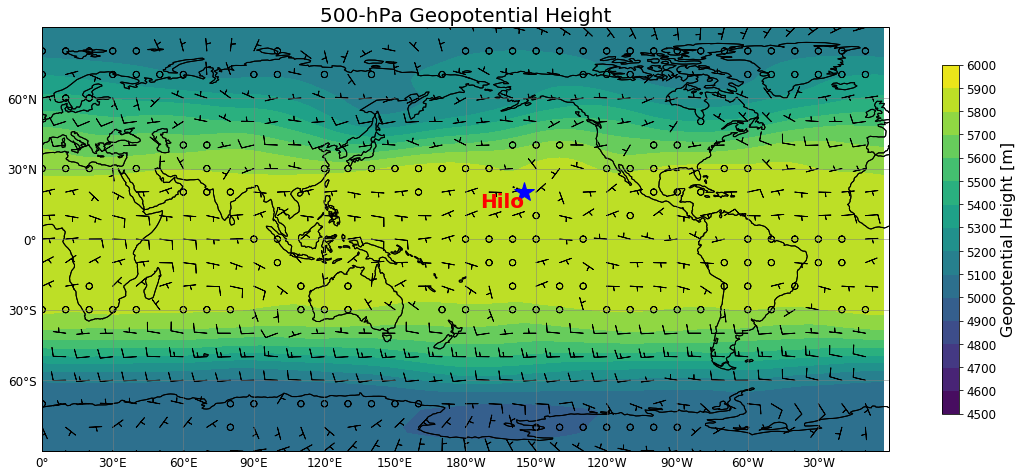

In [211]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(15,10))


ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_extent([-180, 180, -90, 90])

ax.add_feature(cfeature.COASTLINE.with_scale('110m'))
c1 = ax.contourf(hgt_avg['lon'], hgt_avg['lat'], hgt_avg['hgt'],
             transform=ccrs.PlateCarree(), levels = np.linspace(4500, 6000, 16), cmap='viridis')

ax.barbs(uwind_avg.lon[::4].values, uwind_avg.lat[::4].values, uwind_avg['uwnd'][::4, ::4].values, vwind_avg['vwnd'][::4, ::4].values, length=5,
         sizes=dict(emptybarb=0.25, spacing=0.3, height=0.7),linewidth=0.9)
ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='r',transform=ccrs.PlateCarree())
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False
ax.coastlines()


plt.title('500-hPa Geopotential Height', fontsize = 20)
cb = fig.colorbar(c1, shrink=0.5)
cb.ax.tick_params(labelsize = 12)
cb.set_label('Geopotential Height [m]', fontsize = 16)
cb.set_ticks(np.arange(4500, 6001, 100))
plt.tight_layout()
plt.show()
fig.savefig('hgt_wind_500.png')

In [141]:
# hgt = xr.open_dataset('/content/drive/My Drive/hgt_500_ds_yearcombined_extrem.nc', engine='netcdf4')
uwind = xr.open_dataset('/content/drive/My Drive/windu_250_ds_yearcombined_extrem.nc', engine='netcdf4')
vwind = xr.open_dataset('/content/drive/My Drive/windv_250_ds_yearcombined_extrem.nc', engine='netcdf4')


# hgt_avg = hgt.mean(dim='time')
vwind_avg = vwind.mean(dim='time')
uwind_avg = uwind.mean(dim='time')

uwind_avg['uwnd']

<xarray.DataArray 'uwnd' (lat: 73, lon: 144)>
array([[-2.034977  , -2.0475917 , -2.0561926 , ..., -1.9701835 ,
        -1.994266  , -2.0177753 ],
       [ 0.646789  ,  0.6548165 ,  0.6530963 , ...,  0.58142203,
         0.6129587 ,  0.6341743 ],
       [ 4.3491974 ,  4.2408257 ,  4.112959  , ...,  4.550459  ,
         4.5034404 ,  4.43578   ],
       ...,
       [ 2.4902523 ,  2.5384173 ,  2.5705276 , ...,  2.3050458 ,
         2.3744266 ,  2.434633  ],
       [ 2.409977  ,  2.4283257 ,  2.4357798 , ...,  2.3337157 ,
         2.358945  ,  2.3830276 ],
       [ 2.616399  ,  2.568234  ,  2.5063074 , ...,  2.7419724 ,
         2.7041285 ,  2.662844  ]], dtype=float32)
Coordinates:
    level    float32 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

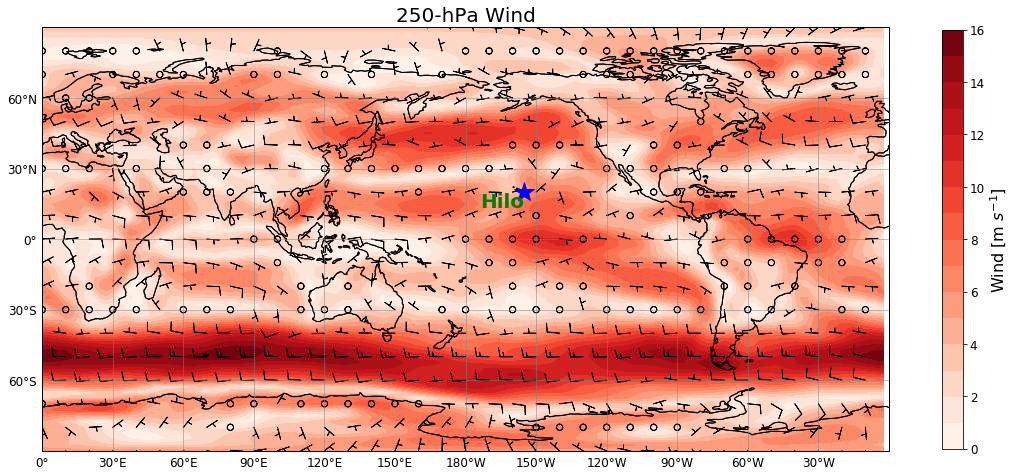

In [209]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(15,10))


ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_extent([-180, 180, -90, 90])

ax.add_feature(cfeature.COASTLINE.with_scale('110m'))
wind_speed = np.sqrt(uwind_avg['uwnd']**2 + vwind_avg['vwnd']**2)
c1 = ax.contourf(uwind_avg.lon, uwind_avg.lat, wind_speed, transform=ccrs.PlateCarree(), levels = 15, cmap='Reds')

ax.barbs(uwind_avg.lon[::4].values, uwind_avg.lat[::4].values, uwind_avg['uwnd'][::4, ::4].values, vwind_avg['vwnd'][::4, ::4].values, length=5,
         sizes=dict(emptybarb=0.25, spacing=0.3, height=0.7),linewidth=0.9)
ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='g',transform=ccrs.PlateCarree())
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False
ax.coastlines()


plt.title('250-hPa Wind', fontsize = 20)
cb = fig.colorbar(c1, shrink=0.6)
cb.ax.tick_params(labelsize = 12)
cb.set_label('Wind [m $s^{-1}$]', fontsize = 16)
#cb.set_ticks(np.arange(4500, 6001, 100))
plt.tight_layout()
plt.show()
fig.savefig('wind_250.png')

In [227]:
uwind = xr.open_dataset('/content/drive/My Drive/windu_850_ds_yearcombined_extrem.nc', engine='netcdf4')
vwind = xr.open_dataset('/content/drive/My Drive/windv_850_ds_yearcombined_extrem.nc', engine='netcdf4')
shum = xr.open_dataset('/content/drive/My Drive/shum_850_ds_yearcombined_extrem.nc', engine='netcdf4')

# hgt_avg = hgt.mean(dim='time')
vwind_avg = vwind.mean(dim='time')
uwind_avg = uwind.mean(dim='time')
shum_avg = shum.mean(dim='time')
shum['shum'].attrs
# ncdump -h '/content/drive/My Drive/shum_850_ds_yearcombined_extrem.nc'

{'GRIB_id': 51,
 'GRIB_name': 'SPFH',
 '_ChunkSizes': array([  1,   1,  73, 144], dtype=int32),
 'dataset': 'NCEP Reanalysis Daily Averages',
 'level_desc': 'Multiple levels',
 'long_name': 'mean Daily specific humidity',
 'parent_stat': 'Individual Obs',
 'precision': 6,
 'statistic': 'Mean',
 'units': 'kg/kg',
 'valid_range': array([-1.000e-04,  6.543e-02], dtype=float32),
 'var_desc': 'Specific humidity'}

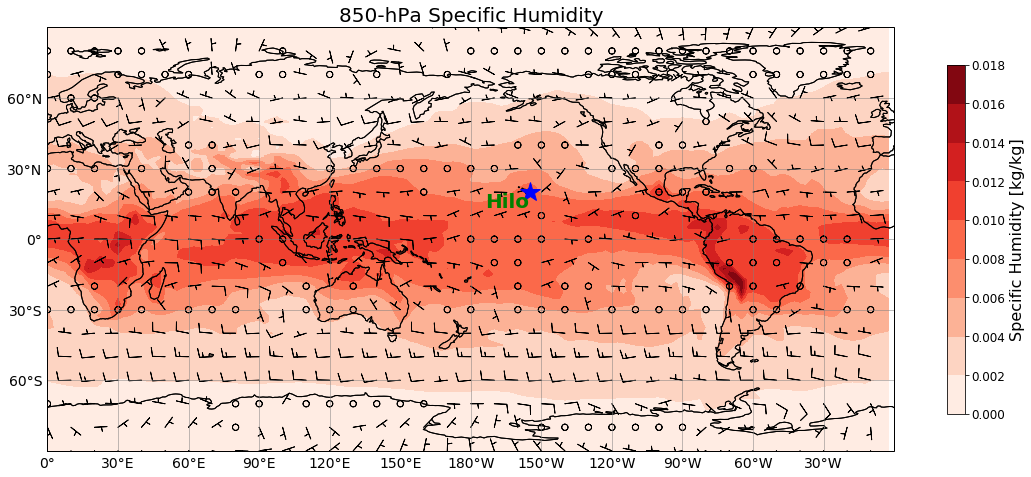

In [231]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(15,10))


ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_extent([-180, 180, -90, 90])

ax.add_feature(cfeature.COASTLINE.with_scale('110m'))
c1 = ax.contourf(shum_avg['lon'], shum_avg['lat'], shum_avg['shum'],
             transform=ccrs.PlateCarree(), levels = 10, cmap='Reds')

ax.barbs(uwind_avg.lon[::4].values, uwind_avg.lat[::4].values, uwind_avg['uwnd'][::4, ::4].values, vwind_avg['vwnd'][::4, ::4].values, length=5,
         sizes=dict(emptybarb=0.25, spacing=0.3, height=0.7),linewidth=0.9)
ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='g',transform=ccrs.PlateCarree())
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 14}
g1.ylabel_style = {'size': 14}
g1.xlabels_top = False
g1.ylabels_right = False
ax.coastlines()


plt.title('850-hPa Specific Humidity', fontsize = 20)
cb = fig.colorbar(c1, shrink=0.5)
cb.ax.tick_params(labelsize = 12)
# ax.tick_params(axis="x", labelsize=8)
# ax.tick_params(axis="y", labelsize=20)

cb.set_label('Specific Humidity [kg/kg]', fontsize = 16)
# cb.set_ticks(np.arange(4500, 6001, 100))
plt.tight_layout()
plt.show()
fig.savefig('shum_850.png')

In [174]:
# uwind = xr.open_dataset('/content/drive/My Drive/windu_850_ds_yearcombined_extrem.nc', engine='netcdf4')
# vwind = xr.open_dataset('/content/drive/My Drive/windv_850_ds_yearcombined_extrem.nc', engine='netcdf4')
temp = xr.open_dataset('/content/drive/My Drive/temp_850_ds_yearcombined_extrem.nc', engine='netcdf4')

# hgt_avg = hgt.mean(dim='time')
# vwind_avg = vwind.mean(dim='time')
# uwind_avg = uwind.mean(dim='time')
temp_avg = temp.mean(dim='time')
temp_avg['air']

<xarray.DataArray 'air' (lat: 73, lon: 144)>
array([[254.11754, 254.11754, 254.11754, ..., 254.11754, 254.11754,
        254.11754],
       [254.72362, 254.73969, 254.75688, ..., 254.66743, 254.68979,
        254.70584],
       [255.15424, 255.22247, 255.28154, ..., 254.9008 , 254.99312,
        255.08028],
       ...,
       [254.76605, 254.71272, 254.65997, ..., 254.95355, 254.88876,
        254.82397],
       [253.56938, 253.53842, 253.50917, ..., 253.66457, 253.62843,
        253.59633],
       [253.57913, 253.57913, 253.57913, ..., 253.57913, 253.57913,
        253.57913]], dtype=float32)
Coordinates:
    level    float32 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

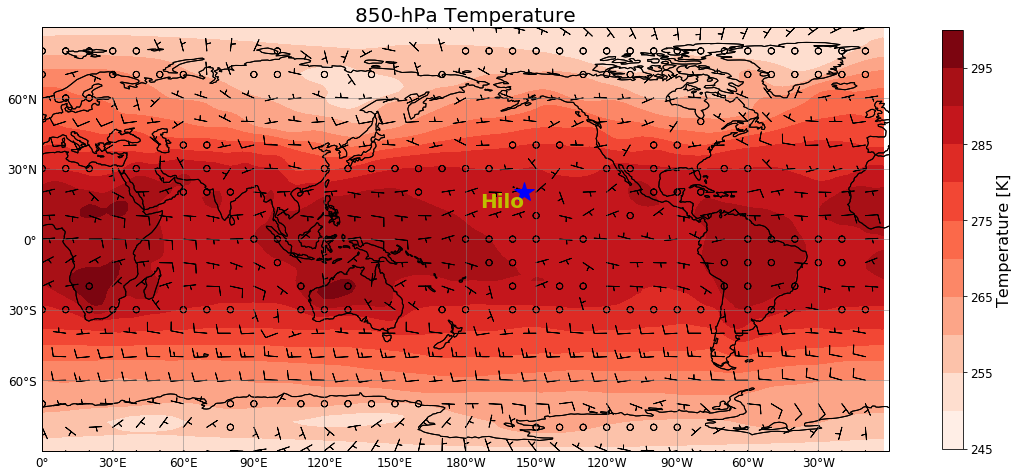

In [206]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(15,10))


ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_extent([-180, 180, -90, 90])

ax.add_feature(cfeature.COASTLINE.with_scale('110m'))
c1 = ax.contourf(temp_avg['lon'], temp_avg['lat'], temp_avg['air'],
             transform=ccrs.PlateCarree(), levels = 10, cmap='Reds')

ax.barbs(uwind_avg.lon[::4].values, uwind_avg.lat[::4].values, uwind_avg['uwnd'][::4, ::4].values, vwind_avg['vwnd'][::4, ::4].values, length=5,
         sizes=dict(emptybarb=0.25, spacing=0.3, height=0.7),linewidth=0.9)
ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False
ax.coastlines()


plt.title('850-hPa Temperature', fontsize = 20)
cb = fig.colorbar(c1, shrink=0.6)
cb.ax.tick_params(labelsize = 12)
cb.set_label('Temperature [K]', fontsize = 16)
# cb.set_ticks(np.arange(4500, 6001, 100))
plt.tight_layout()
plt.show()
fig.savefig('temp_850.png')

In [182]:
surf_uwind = xr.open_dataset('/content/drive/My Drive/surf_windu_ds_yearcombined_extrem.nc', engine='netcdf4')
surf_vwind = xr.open_dataset('/content/drive/My Drive/surf_windv_ds_yearcombined_extrem.nc', engine='netcdf4')
stemp = xr.open_dataset('/content/drive/My Drive/sktemp_ds_yearcombined_extrem.nc', engine='netcdf4')

# hgt_avg = hgt.mean(dim='time')
surf_vwind_avg = vwind.mean(dim='time')
surf_uwind_avg = uwind.mean(dim='time')
stemp_avg = temp.mean(dim='time')
stemp_avg['air']

<xarray.DataArray 'air' (lat: 73, lon: 144)>
array([[254.11754, 254.11754, 254.11754, ..., 254.11754, 254.11754,
        254.11754],
       [254.72362, 254.73969, 254.75688, ..., 254.66743, 254.68979,
        254.70584],
       [255.15424, 255.22247, 255.28154, ..., 254.9008 , 254.99312,
        255.08028],
       ...,
       [254.76605, 254.71272, 254.65997, ..., 254.95355, 254.88876,
        254.82397],
       [253.56938, 253.53842, 253.50917, ..., 253.66457, 253.62843,
        253.59633],
       [253.57913, 253.57913, 253.57913, ..., 253.57913, 253.57913,
        253.57913]], dtype=float32)
Coordinates:
    level    float32 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

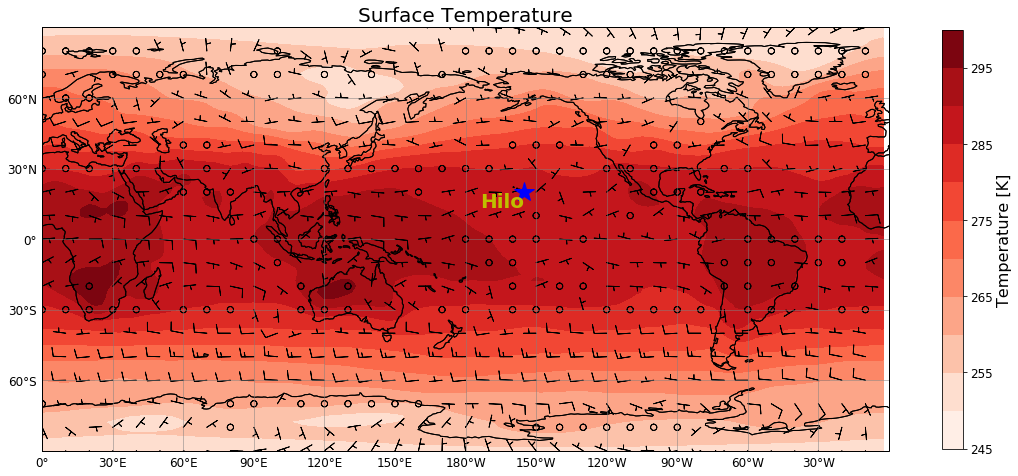

In [205]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature
import matplotlib.ticker as mticker


from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(15,10))


ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_extent([-180, 180, -90, 90])

ax.add_feature(cfeature.COASTLINE.with_scale('110m'))
c1 = ax.contourf(stemp_avg['lon'], stemp_avg['lat'], stemp_avg['air'],
             transform=ccrs.PlateCarree(), levels = 10, cmap='Reds')

ax.barbs(surf_uwind_avg.lon[::4].values, surf_uwind_avg.lat[::4].values, surf_uwind_avg['uwnd'][::4, ::4].values, surf_vwind_avg['vwnd'][::4, ::4].values, length=5,
         sizes=dict(emptybarb=0.25, spacing=0.3, height=0.7),linewidth=0.9)
ax.plot(205.0, 20.0, 'b*', markersize = 20, transform=ccrs.PlateCarree())
plt.text(205.0, 20.0,'Hilo',fontsize=20,fontweight='bold',ha='right',va = 'top', color='y',transform=ccrs.PlateCarree())
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(-180,180,30))
g1.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False

# g1.tick.label.set_fontsize(14) 
# g1.x labels_right = False
ax.coastlines()


plt.title('Surface Temperature', fontsize = 20)
cb = fig.colorbar(c1, shrink=0.6)
cb.ax.tick_params(labelsize = 12)
cb.set_label('Temperature [K]', fontsize = 16)
# cb.set_ticks(np.arange(4500, 6001, 100))
plt.tight_layout()
plt.show()
fig.savefig('surface_temp.png')

# **Baseline for Comparison (1981-2010)**

In [0]:
months = xr.cftime_range(start='0001-01-01', end='0001-12-01', freq='MS', calendar = 'standard') # selecting long-term mean data for 1981-2010 with cftime.DatetimeGregorian format

months = months[(months.month==10)|(months.month==11)|(months.month==12)] # selecting long-term mean data for OND in 1981-2010


In [0]:
# 250 hPa wind vectors and wind speed 

windu_250_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=250, time=months)

windv_250_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=250, time=months)

windspd_250_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/wspd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=250, time=months)

# 500 hPa wind vectors and geopotential height 

windu_500_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=500, time=months)

windv_500_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=500, time=months)

hgt_500_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=500, time=months)

# 850 hPa temperature, specific humidity, and wind vectors 

temp_850_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/air.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850, time=months)

spec_hum_850_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/shum.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850, time=months)

windu_850_ltm_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850, time=months)

windv_850_ltm_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850, time=months)

# skin temperature 

skin_temp_ltm_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/skt.sfc.mon.1981-2010.ltm.nc', engine='netcdf4').sel(time=months)

# surface winds (sig995??)

surf_wind_u_baseline = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/uwnd.sig995.mon.1981-2010.ltm.nc', engine='netcdf4').sel(time=months)

surf_wind_u_baseline = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/vwnd.sig995.mon.1981-2010.ltm.nc', engine='netcdf4').sel(time=months)

# total atmospheric column water vapor 

atm_col_wv_baseline = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/pr_wtr.eatm.day.1981-2010.ltm.nc', engine='netcdf4').sel(time=months)

In [0]:
# windu_250_ltm_OND = windu_250_baseline.isel(time=slice(9,12))

windu_250_ltm_OND = windu_250_baseline.mean(dim='time')
print(windu_250_ltm_OND)

<xarray.Dataset>
Dimensions:         (lat: 73, lon: 144)
Coordinates:
    level           float32 250.0
  * lon             (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat             (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
Data variables:
    uwnd            (lat, lon) float32 -0.73889047 -0.7063348 ... 0.953665
    valid_yr_count  (lat, lon) float32 2.755107e-39 2.755107e-39 ... 0.0 0.0


# **Calculating Seasonal Anomalies**


# **Maps**


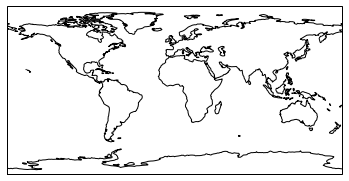

In [0]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('110m'))

plt.show()

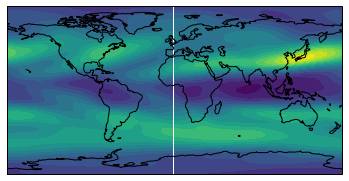

In [0]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('110m'))
plt.contourf(windu_250_ltm_OND['lon'], windu_250_ltm_OND['lat'], windu_250_ltm_OND['uwnd'].values.squeeze(), 20, transform=ccrs.PlateCarree())